Click here to visit the webpage for downloading the data related to this project. This project would judge your creativity and data handling & processing skills.
Introduction:
The Paycheck Protection Program is a loan designed to provide a direct incentive for small businesses to keep their workers on the payroll during the time of COVID-19.
Objective:
Process and analyze the public data provided by SBA.gov for each US state to extract meaningful insights from features in the dataset. 
Processing:
Download multiple datasets (state-wise), from the link provided above and merge them to form one large data-set. 
Analysis:
You are free to perform any analysis on the data, come up with interesting and meaningful insights through analysis. The analysis can be performed on any state data, and will give different results as the data changes. Compare the data for various states, trends for loan amount above and below $ 150,000, predict behaviours and the list goes on. Share with us, whatever you can come up with after going through this data. 
Some sample analysis points are stated below:
• LOAN AMOUNT:
o State Average vs National Average.
o Average loan for a particular city.
o Loan Amount grouped by other KPIs like Business Type, Race, Gender etc.
o Find a linear/non-linear relation between number of jobs reported and loan amount.
o Amount of loan given by each lender etc.

• CITY:
o City wise distribution of businesses granted loans.
o Highest loan lender in each city.
o Compare cities on the basis of loan amounts etc.
•	BUSINESS TYPE:
o Number of jobs reported by different business types.
o Average Loan Amount per business type.
o Compare loan amounts of Male Owned businesses VS Female Owned businesses etc.
• DATE APPROVED:
o Find months in which high amount of loans were sanctioned.
o Find how many jobs were reported in the past months and predict how many could be reported in the upcoming months.
o Find total number of loans approved in each month and use it for Time Series Forecasting to predict how many loans would be approved in the upcoming months etc.
You can come up with similar, creative analysis points, and show how well you can handle a large data-set. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import os

####  merging the 50+ datasets into a single one and then saving it in a csv file called final_dataframe

In [8]:
path=r'C:\Users\PRAKRIT SINHA\Desktop\state lloan'

In [14]:
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
final_df   = pd.concat(df_from_each_file, ignore_index=True)

In [19]:
final_df.to_csv('final_dataframe.csv')

In [3]:
df=pd.read_csv('final_dataframe.csv')
df.head()

C:\Users\PRAKRIT SINHA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,LoanAmount
0,0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN,NaN
1,1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07,NaN
2,2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31,NaN
3,3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01,NaN
4,4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05,NaN


In [15]:
df.isnull().sum()

LoanRange        4549613
BusinessName     4549618
Address          4549630
City                 201
State                165
Zip                  196
NAICSCode         133144
BusinessType        4570
RaceEthnicity          0
Gender                 0
Veteran                0
NonProfit        5029544
JobsReported      337878
DateApproved           0
Lender                 0
CD                  1017
LoanAmount        662515
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212128 entries, 0 to 5212127
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LoanRange      object 
 1   BusinessName   object 
 2   Address        object 
 3   City           object 
 4   State          object 
 5   Zip            float64
 6   NAICSCode      float64
 7   BusinessType   object 
 8   RaceEthnicity  object 
 9   Gender         object 
 10  Veteran        object 
 11  NonProfit      object 
 12  JobsReported   float64
 13  DateApproved   object 
 14  Lender         object 
 15  CD             object 
 16  LoanAmount     float64
dtypes: float64(4), object(13)
memory usage: 676.0+ MB


In [17]:
df.describe()

,Zip,NAICSCode,JobsReported,LoanAmount
count,5.211932e+06,5.078984e+06,4.874250e+06,4.549613e+06
mean,5.106238e+04,5.390139e+05,1.044757e+01,3.232180e+04
std,3.003900e+04,1.874014e+05,3.060968e+01,3.283619e+04
min,9.200000e+01,1.111100e+05,-6.000000e+00,1.000000e-02
25%,2.810400e+04,4.452990e+05,1.000000e+00,9.350000e+03
50%,4.843300e+04,5.412190e+05,3.000000e+00,2.066100e+04
75%,7.823300e+04,6.241200e+05,8.000000e+00,4.350000e+04
max,9.995000e+04,9.999900e+05,5.000000e+02,1.499991e+05


In [18]:
df['LoanRange'].value_counts()

e $150,000-350,000      380636
d $350,000-1 million    199679
c $1-2 million           53218
b $2-5 million           24248
a $5-10 million           4734
Name: LoanRange, dtype: int64

In [19]:
df.groupby('LoanRange').mean()

,Zip,NAICSCode,JobsReported,LoanAmount
LoanRange,,,,
a $5-10 million,50720.390579,484680.349640,371.996193,NaN
b $2-5 million,50832.640589,487122.503744,226.129616,NaN
c $1-2 million,50995.242907,482893.719106,120.158788,NaN
"d $350,000-1 million",51309.748278,489916.305111,53.029555,NaN
"e $150,000-350,000",51434.323108,516294.896585,23.944089,NaN


### national avg loan amount

In [22]:
round(df['LoanAmount'].mean(),2)

32321.8

### average loan per state

In [114]:
state_list=list(df['State'].unique())
state_list=state_list[1:]

In [115]:
loan_amt_dict={}
for x in state_list:
    loan_amt_dict[x]=df[df['State']==x]['LoanAmount'].mean()

In [116]:
loan_amt_dict

{'AK': 35969.79013690696,
 'AL': 30937.945392323538,
 'AR': 29334.661295365677,
 'AS': 22901.754492753622,
 'AZ': 33281.95841061248,
 'CA': 34501.11640469342,
 'CO': 32244.084740652423,
 'CT': 33643.4786703615,
 'DC': 37608.0033937581,
 'DE': 36628.167282364586,
 'FL': 29135.578558833877,
 'GA': 30080.44958269279,
 'GU': 32360.116472120902,
 'HI': 32535.630883856986,
 'IA': 26780.065173550734,
 'ID': 32153.70154228877,
 'IL': 29981.108452926528,
 'IN': 33704.28153674741,
 'KS': 28347.686127650206,
 'KY': 33428.40704747395,
 'LA': 30698.24607368971,
 'MA': 36164.35570209222,
 'MD': 34594.86948193779,
 'ME': 28996.732495381275,
 'MI': 37226.106453041975,
 'MN': 30850.27094730803,
 'MO': 30564.506501147418,
 'MP': 34183.50067757009,
 'MS': 26666.898520601266,
 'MT': 30153.880626324986,
 'NC': 33697.22932109998,
 'ND': 28539.081908088625,
 'NE': 26620.240776463324,
 'NH': 36140.970557877605,
 'NJ': 34131.5604093249,
 'NM': 34978.46979556151,
 'NV': 31665.87912684193,
 'NY': 32797.955333820

<AxesSubplot:>

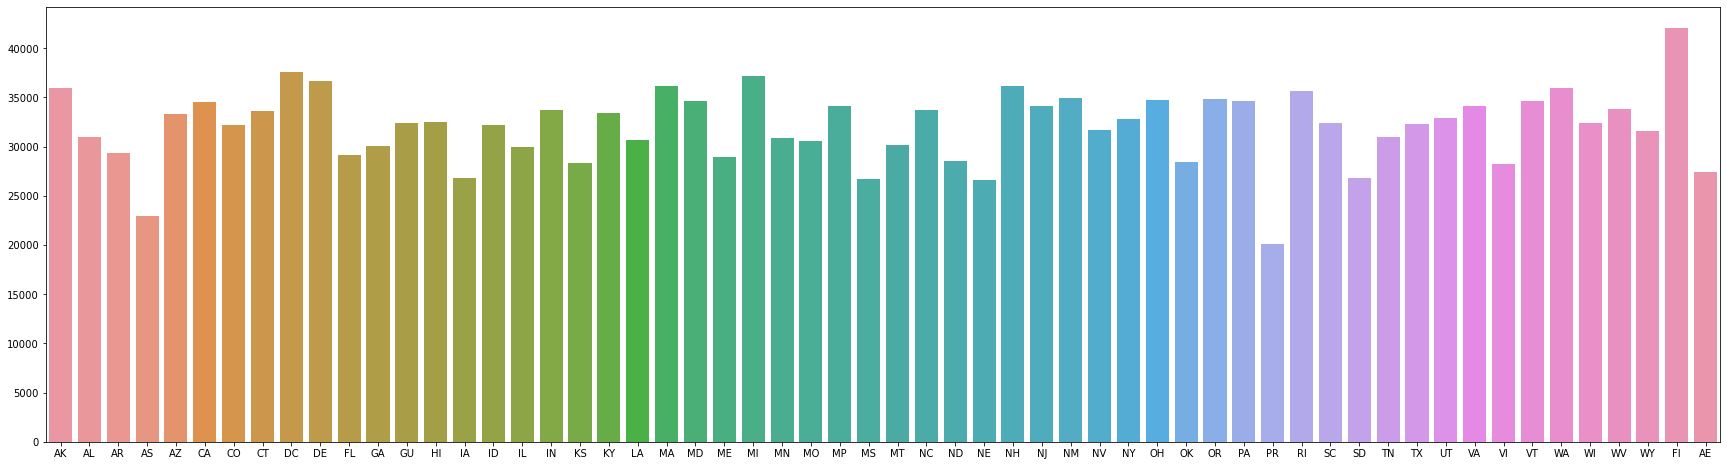

In [117]:
plt.figure(figsize=(30,8))
sns.barplot(x=list(loan_amt_dict.keys()),y=list(loan_amt_dict.values()))

### Loan Amount grouped by type of business
### mean

In [26]:
df.groupby('BusinessType').mean()['LoanAmount']

BusinessType
Cooperative                            46463.982716
Corporation                            41905.636551
Employee Stock Ownership Plan(ESOP)    42952.756053
Independent Contractors                11069.173803
Joint Venture                          35376.089612
Limited  Liability Company(LLC)        33860.833478
Limited Liability Partnership          43549.346661
Non-Profit Childcare Center            53884.479571
Non-Profit Organization                39960.133828
Partnership                            38953.040920
Professional Association               42277.159912
Rollover as Business Start-Ups (ROB    23426.501176
Self-Employed Individuals              12600.732538
Sole Proprietorship                    16160.488732
Subchapter S Corporation               41547.065870
Tenant in Common                       24488.106780
Trust                                  34793.074613
Name: LoanAmount, dtype: float64

### sum

In [27]:
df.groupby('BusinessType').sum()['LoanAmount']

BusinessType
Cooperative                            2.171262e+08
Corporation                            5.088522e+10
Employee Stock Ownership Plan(ESOP)    1.447508e+07
Independent Contractors                1.716984e+09
Joint Venture                          1.733428e+07
Limited  Liability Company(LLC)        4.363304e+10
Limited Liability Partnership          1.216769e+09
Non-Profit Childcare Center            1.066913e+08
Non-Profit Organization                5.538914e+09
Partnership                            2.323705e+09
Professional Association               8.997002e+08
Rollover as Business Start-Ups (ROB    3.982505e+05
Self-Employed Individuals              3.014473e+09
Sole Proprietorship                    1.310874e+10
Subchapter S Corporation               2.416556e+10
Tenant in Common                       1.148492e+07
Trust                                  3.371449e+07
Name: LoanAmount, dtype: float64

### Loan Amount grouped by gender
### sum

In [28]:
df.groupby('Gender').sum()['LoanAmount']

Gender
Female Owned    7.719167e+09
Male Owned      2.864036e+10
Unanswered      1.106922e+11
Name: LoanAmount, dtype: float64

### mean

In [29]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female Owned    34447.647307
Male Owned      40860.745121
Unanswered      30539.113465
Name: LoanAmount, dtype: float64

### Loan Amount grouped by Ethnicity
### mean

In [32]:
df.groupby('RaceEthnicity').mean()['LoanAmount']

RaceEthnicity
American Indian or Alaska Native    40030.348928
Asian                               39203.387344
Black or African American           29679.966205
Eskimo & Aleut                       8691.400000
Hispanic                            36229.461479
Multi Group                         25172.200000
Puerto Rican                        13992.683961
Unanswered                          31564.012792
White                               40163.526525
Name: LoanAmount, dtype: float64

### sum

In [33]:
df.groupby('RaceEthnicity').sum()['LoanAmount']

RaceEthnicity
American Indian or Alaska Native    9.263023e+07
Asian                               2.030265e+09
Black or African American           4.581696e+08
Eskimo & Aleut                      4.345700e+04
Hispanic                            1.293718e+09
Multi Group                         2.517220e+05
Puerto Rican                        2.154873e+06
Unanswered                          1.296405e+11
White                               1.353398e+10
Name: LoanAmount, dtype: float64

### scatter plot showing relationship between jobs reported and the loan amount: it has a non linear relationship and companies with upto 200 jobs reported have the highest loan amount

<AxesSubplot:xlabel='JobsReported', ylabel='LoanAmount'>

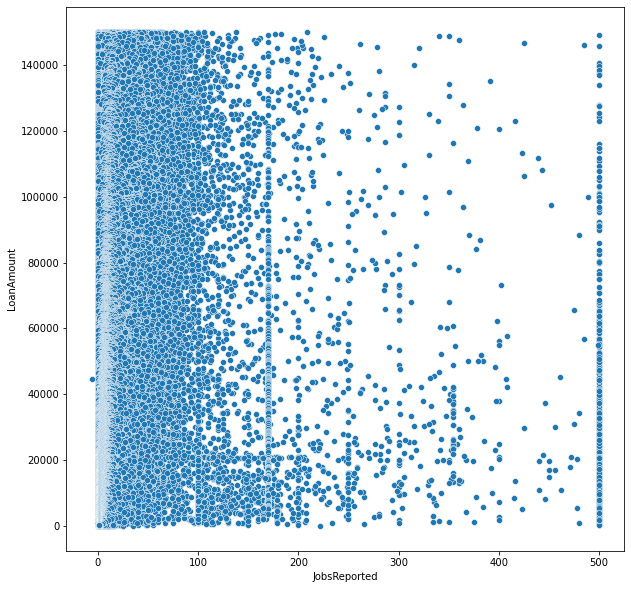

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='JobsReported',y='LoanAmount')

### total loan amount per the lending body

In [43]:
df.groupby('Lender').sum()['LoanAmount']

Lender
\tFarm Credit Services of Western Arkansas, ACA      857989.87
\tFarm Credit of Western Oklahoma, ACA               521822.45
\tYankee Farm Credit, ACA                           5053492.86
121 Financial CU                                   14983650.00
1880 Bank                                           9656773.73
                                                      ...     
cPort CU                                            2698410.86
iTHINK Financial CU                                37967150.00
immito, LLC                                         7309755.00
mBank                                              44540210.00
the Farmers State Bank of Bucklin, Kansas            457410.84
Name: LoanAmount, Length: 4891, dtype: float64

### mean loan amount grouped by the lending body

In [46]:
df.groupby('Lender').mean()['LoanAmount']

Lender
\tFarm Credit Services of Western Arkansas, ACA    15321.247679
\tFarm Credit of Western Oklahoma, ACA             14909.212857
\tYankee Farm Credit, ACA                          37433.280444
121 Financial CU                                   31880.106383
1880 Bank                                          40918.532754
                                                       ...     
cPort CU                                           15074.921006
iTHINK Financial CU                                29250.500770
immito, LLC                                        31920.327511
mBank                                              41939.934087
the Farmers State Bank of Bucklin, Kansas          13068.881143
Name: LoanAmount, Length: 4891, dtype: float64

### total loan amount as per the city

In [54]:
df.groupby('City').sum()['LoanAmount']

City
# 11-H              20800.00
# 306               83180.00
#269                20000.00
#2D                 20832.00
#3                  22645.00
                     ...    
zionsville          41658.17
zone Park           37082.00
zone park             727.00
zuni                44650.00
{Peachtree City    146457.30
Name: LoanAmount, Length: 65900, dtype: float64

### jobs reported per business type

In [55]:
df.groupby('BusinessType').sum()['JobsReported']

BusinessType
Cooperative                              122366.0
Corporation                            18905739.0
Employee Stock Ownership Plan(ESOP)       49547.0
Independent Contractors                  159402.0
Joint Venture                              7607.0
Limited  Liability Company(LLC)        14557286.0
Limited Liability Partnership            542808.0
Non-Profit Childcare Center               63572.0
Non-Profit Organization                 3968583.0
Partnership                              894433.0
Professional Association                 326664.0
Rollover as Business Start-Ups (ROB         139.0
Self-Employed Individuals                345167.0
Sole Proprietorship                     2020496.0
Subchapter S Corporation                8846215.0
Tenant in Common                            938.0
Trust                                     22668.0
Name: JobsReported, dtype: float64

### average loan amount per business type

In [59]:
df.groupby('BusinessType').mean()['LoanAmount']

BusinessType
Cooperative                            46463.982716
Corporation                            41905.636551
Employee Stock Ownership Plan(ESOP)    42952.756053
Independent Contractors                11069.173803
Joint Venture                          35376.089612
Limited  Liability Company(LLC)        33860.833478
Limited Liability Partnership          43549.346661
Non-Profit Childcare Center            53884.479571
Non-Profit Organization                39960.133828
Partnership                            38953.040920
Professional Association               42277.159912
Rollover as Business Start-Ups (ROB    23426.501176
Self-Employed Individuals              12600.732538
Sole Proprietorship                    16160.488732
Subchapter S Corporation               41547.065870
Tenant in Common                       24488.106780
Trust                                  34793.074613
Name: LoanAmount, dtype: float64

In [63]:
df.dtypes

LoanRange         object
BusinessName      object
Address           object
City              object
State             object
Zip              float64
NAICSCode        float64
BusinessType      object
RaceEthnicity     object
Gender            object
Veteran           object
NonProfit         object
JobsReported     float64
DateApproved      object
Lender            object
CD                object
LoanAmount       float64
dtype: object

In [72]:
df['DateApproved']=pd.to_datetime(df['DateApproved'])

In [73]:
df.dtypes

LoanRange                object
BusinessName             object
Address                  object
City                     object
State                    object
Zip                     float64
NAICSCode               float64
BusinessType             object
RaceEthnicity            object
Gender                   object
Veteran                  object
NonProfit                object
JobsReported            float64
DateApproved     datetime64[ns]
Lender                   object
CD                       object
LoanAmount              float64
dtype: object

In [74]:
df.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,LoanAmount
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NaN,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,2020-05-03,"Bank of America, National Association",WA-07,NaN
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,2020-05-03,"Bank of America, National Association",CA-31,NaN
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,2020-05-03,Synovus Bank,SC-01,NaN
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,2020-05-03,Synovus Bank,SC-05,NaN


In [82]:
df['month'] = pd.DatetimeIndex(df['DateApproved']).month


In [83]:
df.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,LoanAmount,month
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NaN,NaN,5
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,2020-05-03,"Bank of America, National Association",WA-07,NaN,5
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,2020-05-03,"Bank of America, National Association",CA-31,NaN,5
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,2020-05-03,Synovus Bank,SC-01,NaN,5
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,2020-05-03,Synovus Bank,SC-05,NaN,5


In [86]:
df.groupby('month').count()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,LoanAmount
month,,,,,,,,,,,,,,,,,
4,549046,549042,549046,2900725,2900725,2900725,2900568,2900649,2900725,2900725,2900725,133377,2756621,2900725,2900725,2900723,2351679
5,94433,94432,94416,1512694,1512730,1512699,1379919,1508401,1512895,1512895,1512895,35432,1383835,1512895,1512895,1511880,1418462
6,11657,11657,11657,419661,419661,419661,419650,419661,419661,419661,419661,8223,373120,419661,419661,419661,408004
7,4498,4498,4498,238423,238423,238423,238423,238423,238423,238423,238423,3116,227154,238423,238423,238423,233925
8,2881,2881,2881,140424,140424,140424,140424,140424,140424,140424,140424,2436,133520,140424,140424,140424,137543


### according to above table the maximum number of loan is taken in the 4th month of the year ie. april

In [87]:
df.groupby('month').sum()

,Zip,NAICSCode,JobsReported,LoanAmount
month,,,,
4,1.470415e+11,1.528257e+12,40114059.0,9.394013e+10
5,7.901771e+10,7.735646e+11,8344631.0,3.894571e+10
6,2.104469e+10,2.293900e+11,1430040.0,7.739043e+09
7,1.197295e+10,1.304082e+11,618519.0,4.005994e+09
8,7.056843e+09,7.602260e+10,416831.0,2.420810e+09


###  according to above table the maximum amount of loan is also taken in the 4th month of the year ie. april

In [92]:
x=pd.read_csv('city-avg_loan.csv')
x=x.drop('Unnamed: 0',axis=1)

### below table has average loan amount per city

In [93]:
x

,city_name,avg loan amt
0,SEATTLE,37754.89
1,SAN BERNARDINO,36577.40
2,North Charleston,29063.33
3,Sumter,20301.31
4,Saint Johns,23278.99
...,...,...
65895,cody,2225.73
65896,ROBERTSON,2247.00
65897,WAPITI,2022.50
65898,Lance Creek,1355.00


In [95]:
df['DateApproved'].min()

Timestamp('2020-04-03 00:00:00')

In [96]:
df['DateApproved'].max()

Timestamp('2020-08-08 00:00:00')

### the data ranges 4 months, lets find out the number of  jobs reported per month

In [104]:
df.groupby('month').sum()['JobsReported']

month
4    40114059.0
5     8344631.0
6     1430040.0
7      618519.0
8      416831.0
Name: JobsReported, dtype: float64

### lets try to see the trend of jobs reported for the future months

In [105]:
jobs_reported=list(df.groupby('month').sum()['JobsReported'])

In [106]:
month=[4,5,6,7,8]

<AxesSubplot:>

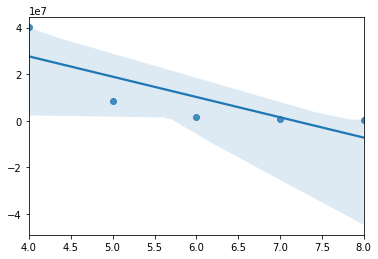

In [107]:
sns.regplot(x=month,y=jobs_reported)

### the general trend for the jobs reported is on a steady decline 

### lets find loan approved per month

In [109]:
df.groupby('month').count()['LoanAmount']

month
4    2351679
5    1418462
6     408004
7     233925
8     137543
Name: LoanAmount, dtype: int64

### lets predict trend of the loan approval

In [110]:
loan_approved=list(df.groupby('month').count()['LoanAmount'])

<AxesSubplot:>

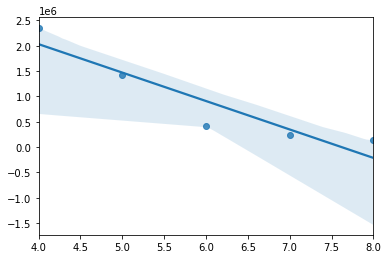

In [112]:
sns.regplot(x=month,y=loan_approved)

### loan approval is on a decline as well
